## Load row train&test csv 

In [1]:
import numpy as np 
import pandas as pd
import os 
import pathlib
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
currPath = pathlib.Path().absolute(); print(currPath)
train = pd.read_csv(os.path.join(currPath, "digit-recognizer/train.csv"))
test = pd.read_csv(os.path.join(currPath, "digit-recognizer/test.csv"))

/Users/MikioTada/GitHub/Softmax-MNIST-from-Kaggle


In [3]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# convert dataframe into numpy 
TRAIN_X = train.drop(labels=["label"], axis=1).to_numpy(dtype=np.uint8)
TRAIN_Y = train["label"].to_numpy(dtype=np.uint8)

In [5]:
# split TRAIN_X&TRAIN_Y into 80% train and 20% validation 
shuffledIDX = np.arange(TRAIN_X.shape[0])
np.random.shuffle(shuffledIDX)

TRAIN_X = TRAIN_X[shuffledIDX]
TRAIN_Y = TRAIN_Y[shuffledIDX]

train_len = int(len(TRAIN_X)*0.8)

X_train, X_val = TRAIN_X[shuffledIDX[:train_len]], TRAIN_X[shuffledIDX[train_len:]]
y_train, y_val = TRAIN_Y[shuffledIDX[:train_len]], TRAIN_Y[shuffledIDX[train_len:]]

print(f"Train Rows: {X_train.shape[0]:d}, Train Columns: {X_train.shape[1]:d}")
print(f"Valid Rows: {X_val.shape[0]:d}, Valid Columns: {X_val.shape[1]:d}")

Train Rows: 33600, Train Columns: 784
Valid Rows: 8400, Valid Columns: 784


In [6]:
# test = test.to_numpy(dtype=np.unit8)

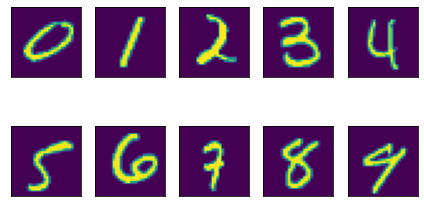

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img)

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Create png files

In [7]:
for idx, row in enumerate(X_train):
    file_name = f"{idx}.png"
    file_path = os.path.join('mnist_train', file_name)
    im = Image.fromarray(row.reshape(28, 28))
    im.save(file_path) 

In [8]:
for idx,row in enumerate(X_val):
    file_name = f"{X_train.shape[0] + idx}.png"
    file_path = os.path.join('mnist_val', file_name)
    im = Image.fromarray(row.reshape(28, 28))
    im.save(file_path)

## Create CSV files where one columns is label, and another column is png file

In [9]:
df_train = pd.DataFrame(y_train, columns=['label'])
df_train['image'] = [f"{idx}.png" for idx in range(y_train.shape[0])]
df_train.head()

,label,image
0,5,0.png
1,3,1.png
2,8,2.png
3,3,3.png
4,7,4.png


In [12]:
df_val = pd.DataFrame(y_val, columns=['label'])
df_val['image'] = [f"{X_train.shape[0] + idx}.png" for idx in range(y_val.shape[0])]
df_val.head()

,label,image
0,9,33600.png
1,1,33601.png
2,0,33602.png
3,0,33603.png
4,6,33604.png


In [13]:
df_train.to_csv('customed_train.csv', index=None)
df_val.to_csv('customed_valid.csv', index=None)